# Atividade 3 - Arthur Cerveira
## Exercício 1 - Tranformações de intensidade

O exercício 1 consiste na implementação de duas funções de tranformação de intensidade. Esse tipo de transformação afeta apenas os valores de intensidade das amostras de uma imagem. Foram escolhidas as funções de correção de gamma e de negativo para esse exercício

Abaixo está a imagem original e a implementação das funções.

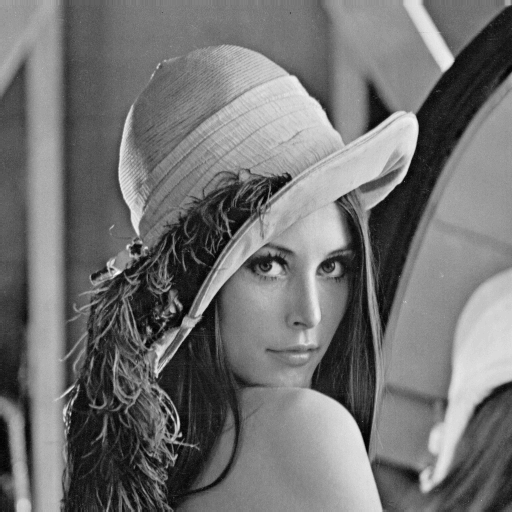

In [1]:
lenna = imread('./images/lena_cinza.bmp');
imshow(lenna);

In [2]:
function output = gamma_correction (image_path, gamma, c=1, l=256)
    image = imread(strcat('images/', image_path));
    
    % Convert to a value between 0 and 1
    image_float = im2double(image) / (l - 1);
    
    % Power image to gamma and convert it back to uint8
    output = 255 * c * power(image_float, gamma);
endfunction


function output = negative (image_path, l)
    image = imread(strcat('images/', image_path));

    output =  l - 1 - image;
endfunction

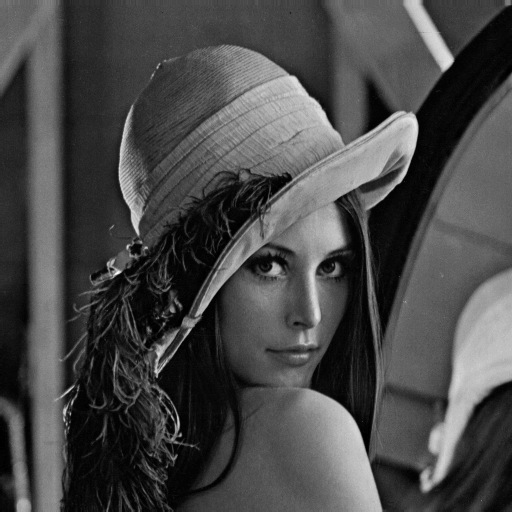

In [3]:
img = gamma_correction ("lena_cinza.bmp", 2);

imshow(img);

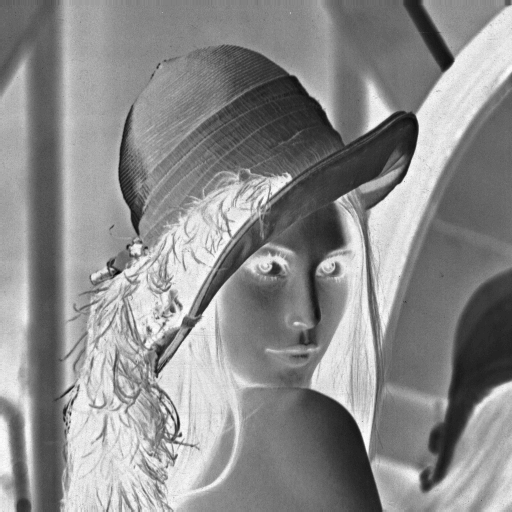

In [4]:
img = negative ("lena_cinza.bmp", 256);

imshow(img);

## Exercício 2 - Tranformações geométricas

O exercício 2 consiste na implementação de duas funções de tranformação geométricas. Esse tipo de transformação afeta as posições dos pixels da imagem, e em seus valores em operações que involvam interpolação. Foram escolhidas as funções de translação e cisalhamento (vertical e horizontal) para esse exercício.

Abaixo está implementação das funções.

In [5]:
function output = translate (image_path, tx, ty)
    image = imread(strcat('images/', image_path));
    
    [width, height] = size(image);
  
    output = zeros(width, height, "uint8");
    
    % Map positions from 1 to width & height minus tx & ty in input image
    % To positions tx & ty to width & height in output image
    output(tx + 1:width, ty + 1:height) = image(1:width - tx, 1:height - ty);
endfunction


function output = shear_mapping (image_path, cv=0, ch=0)
    image = imread(strcat('images/', image_path));
    
    [width, height] = size(image);
  
    output = zeros(width, height, "uint8");
    
    for v = (1:width)
        for w = (1:height)
            x = floor(v + cv * w);
            y = floor(ch * v + w);

            output(x, y) = image(v, w);
        endfor
    endfor
endfunction

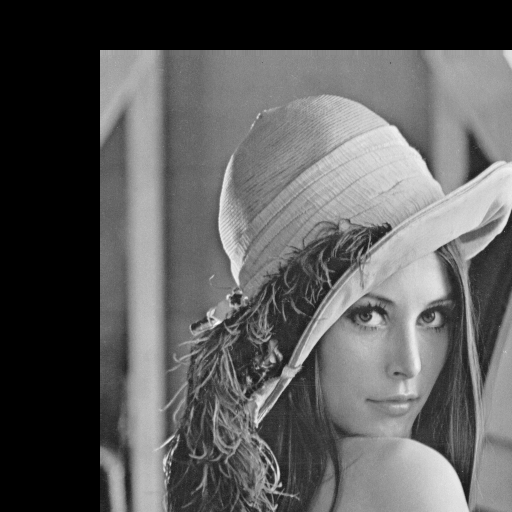

In [6]:
img = translate ("lena_cinza.bmp", 50, 100);

imshow(img);

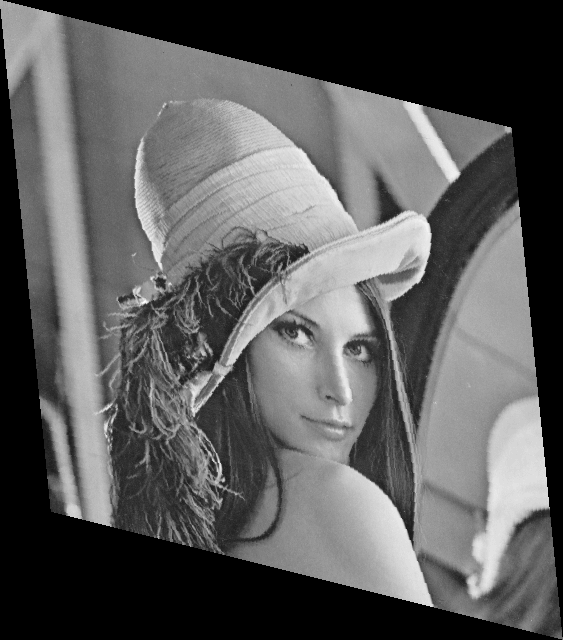

In [7]:
img = shear_mapping ("lena_cinza.bmp", 0.25, 0.1);

imshow(img);